## Pima Native American Indian Diabetes dataset. Using multiple logistic regression to predict diabetes.


## 1. Preparing environment

In [36]:

# Setting my working directory
setwd("C:/Users/Rumil/Datasets")

#importing my dataset and creating the object diabetes, for the diabetes dataset
diabetes_data <- read.csv("C:/Users/Rumil/Datasets/pima_indians_diabetes.csv")

#loading in packages for R
library(tidyverse)
library(reshape2)
library(ggplot2)
library(ggcorrplot)

## 2. Dataset Overview

In [37]:
# A glimpse and summary of the data set
head(diabetes_data, 5)
glimpse(diabetes_data)
summary(diabetes_data)

#checking for any missing values
colSums(is.na(diabetes_data))

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1


Observations: 768
Variables: 9
$ Pregnancies              <int> 6, 1, 8, 1, 0, 5, 3, 10, 2, 8, 4, 10, 10, ...
$ Glucose                  <int> 148, 85, 183, 89, 137, 116, 78, 115, 197, ...
$ BloodPressure            <int> 72, 66, 64, 66, 40, 74, 50, 0, 70, 96, 92,...
$ SkinThickness            <int> 35, 29, 0, 23, 35, 0, 32, 0, 45, 0, 0, 0, ...
$ Insulin                  <int> 0, 0, 0, 94, 168, 0, 88, 0, 543, 0, 0, 0, ...
$ BMI                      <dbl> 33.6, 26.6, 23.3, 28.1, 43.1, 25.6, 31.0, ...
$ DiabetesPedigreeFunction <dbl> 0.627, 0.351, 0.672, 0.167, 2.288, 0.201, ...
$ Age                      <int> 50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 30...
$ Outcome                  <int> 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, ...


  Pregnancies        Glucose      BloodPressure    SkinThickness  
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9   Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    Insulin           BMI        DiabetesPedigreeFunction      Age       
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780           Min.   :21.00  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437           1st Qu.:24.00  
 Median : 30.5   Median :32.00   Median :0.3725           Median :29.00  
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719           Mean   :33.24  
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262           3rd Qu.:41.00  
 Max.   :846.0   Max.   :67.10   Max.   :2.4200           Max.   :81.00  
    Outcome  

Pregnancies                  Glucose            BloodPressure 
                       0                        0                        0 
           SkinThickness                  Insulin                      BMI 
                       0                        0                        0 
DiabetesPedigreeFunction                      Age                  Outcome 
                       0                        0                        0

## 3. Preparing environment and ensuring correct data types before exploratory data analysis

In [38]:
#we notice the 0's in the dataset which although are not NA or NULLS and just doesnt make sense to have a BMI of 0,
#these data points can skew our model
#So in this case it is best that we get rid of these observations that include 0's specifically for columns "Glucose" to "DiabetesPedigreeFunction"
# i.e columns 2:6 ; which does drop the total observations from 768 down to 392 but is okay because we want to work with clean data, hence the data cleaning process
for (i in 2:6) {
      diabetes_data <- diabetes_data[-which(diabetes_data[, i] == 0), ]
}

# Use the 'mutate' function from dplyr package to recode the data and add it into our dataset as a new column

diabetes_data %>% mutate(Diabetic = ifelse(Outcome > 0, 1, 0))-> diabetes_data

#notice the new column marked as diabetic

head(diabetes_data, 5)
glimpse(diabetes_data)


Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Diabetic
1,89,66,23,94,28.1,0.167,21,0,0
0,137,40,35,168,43.1,2.288,33,1,1
3,78,50,32,88,31.0,0.248,26,1,1
2,197,70,45,543,30.5,0.158,53,1,1
1,189,60,23,846,30.1,0.398,59,1,1


Observations: 392
Variables: 10
$ Pregnancies              <int> 1, 0, 3, 2, 1, 5, 0, 1, 1, 3, 11, 10, 1, 1...
$ Glucose                  <int> 89, 137, 78, 197, 189, 166, 118, 103, 115,...
$ BloodPressure            <int> 66, 40, 50, 70, 60, 72, 84, 30, 70, 88, 94...
$ SkinThickness            <int> 23, 35, 32, 45, 23, 19, 47, 38, 30, 41, 33...
$ Insulin                  <int> 94, 168, 88, 543, 846, 175, 230, 83, 96, 2...
$ BMI                      <dbl> 28.1, 43.1, 31.0, 30.5, 30.1, 25.8, 45.8, ...
$ DiabetesPedigreeFunction <dbl> 0.167, 2.288, 0.248, 0.158, 0.398, 0.587, ...
$ Age                      <int> 21, 33, 26, 53, 59, 51, 31, 33, 32, 27, 51...
$ Outcome                  <int> 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, ...
$ Diabetic                 <dbl> 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, ...


## 4. Using t-tests to see which variables are key predictors associated with diabetes.

In [39]:

# Does age have an effect? Age is continuous, so we use a t-test
diabetes_Age <- t.test(diabetes_data$Age ~ diabetes_data$Diabetic)

# what about skin thickness? Im curious and since it is also a continuous variableAge we use a t-test
diabetes_Glucose <- t.test(diabetes_data$Glucose ~ diabetes_data$Diabetic)

# BMI? BMI is also continuous so we can use a t-test
diabetes_BMI <- t.test(diabetes_data$BMI ~ diabetes_data$Diabetic)

# Print the results to see if p<0.05.
print(diabetes_Age)
print(diabetes_Glucose)
print(diabetes_BMI)


	Welch Two Sample t-test

data:  diabetes_data$Age by diabetes_data$Diabetic
t = -6.993, df = 222.83, p-value = 3.098e-11
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -9.730358 -5.451909
sample estimates:
mean in group 0 mean in group 1 
       28.34733        35.93846 


	Welch Two Sample t-test

data:  diabetes_data$Glucose by diabetes_data$Diabetic
t = -11.151, df = 218.7, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -39.72817 -27.79385
sample estimates:
mean in group 0 mean in group 1 
       111.4313        145.1923 


	Welch Two Sample t-test

data:  diabetes_data$BMI by diabetes_data$Diabetic
t = -5.5571, df = 259.51, p-value = 6.797e-08
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -5.453875 -2.599983
sample estimates:
mean in group 0 mean in group 1 
       31.75076        35.77769 



## 5. Visual Exploration

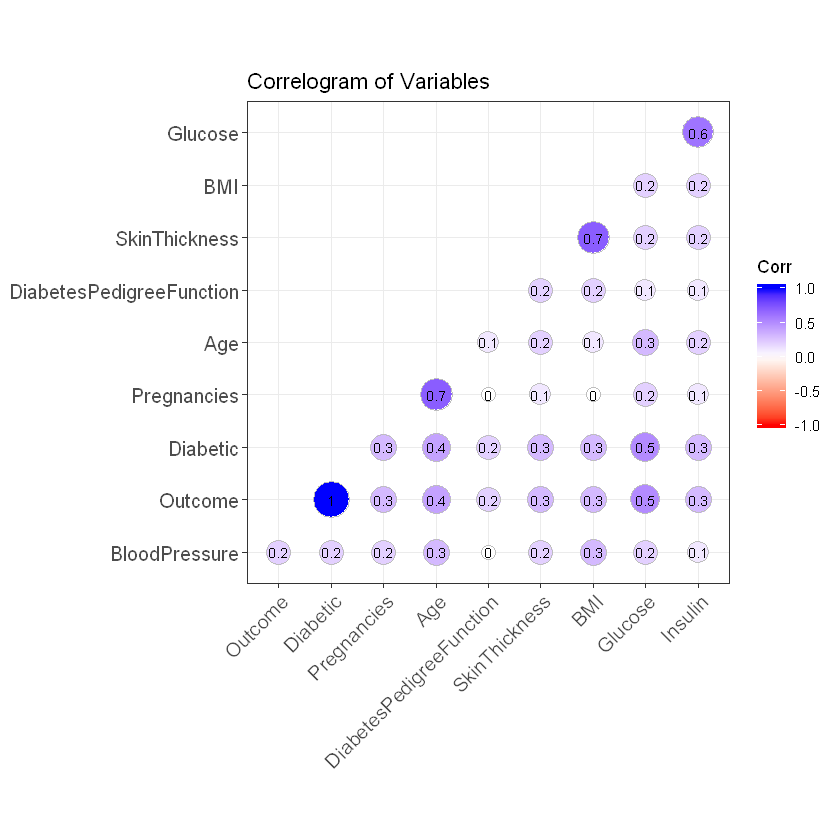

In [40]:
#lets check out the correlation between these predictors, we can use a correlogram 


corr<-round(cor(diabetes_data),1)

ggcorrplot(corr, hc.order = TRUE, 
           type = "lower", 
           lab = TRUE, 
           lab_size = 3, 
           method="circle", 
           colors = c("red", "white", "blue"), 
           title="Correlogram of Variables", 
           ggtheme=theme_bw)



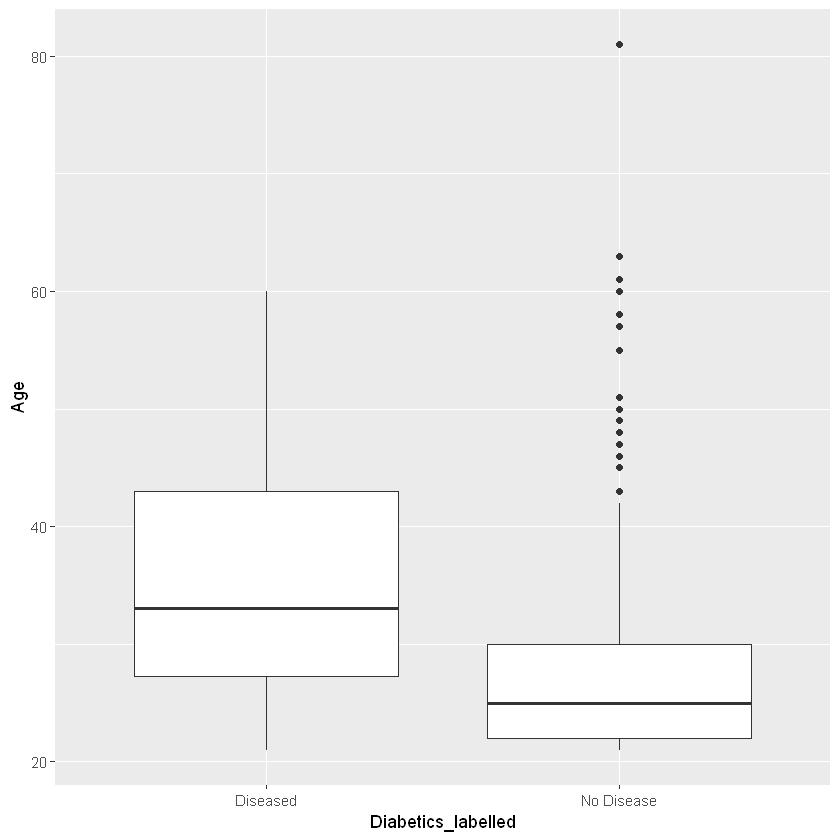

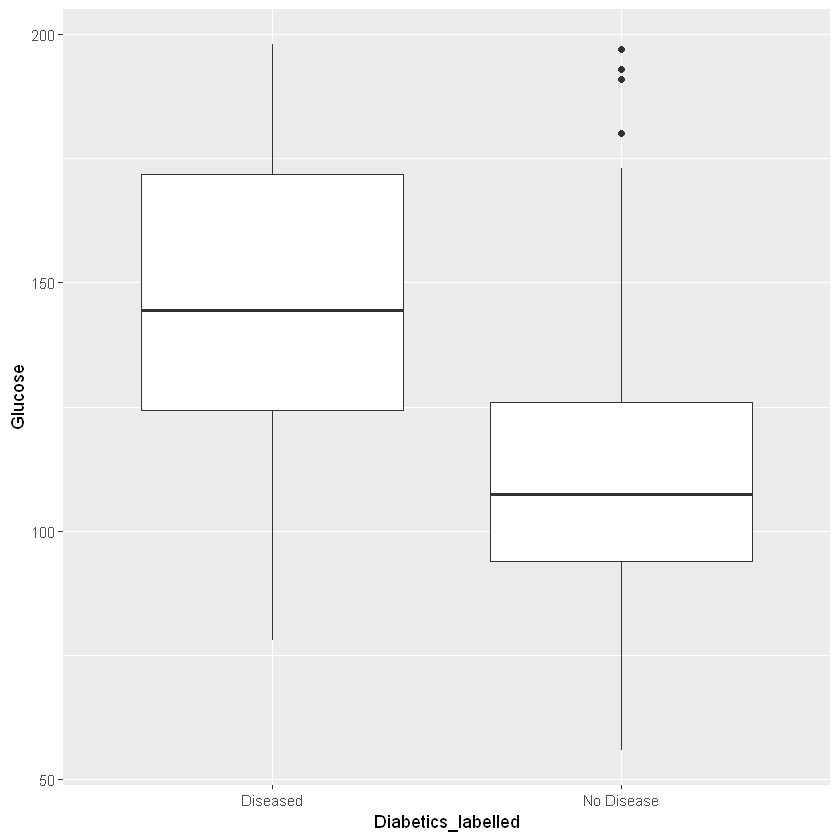

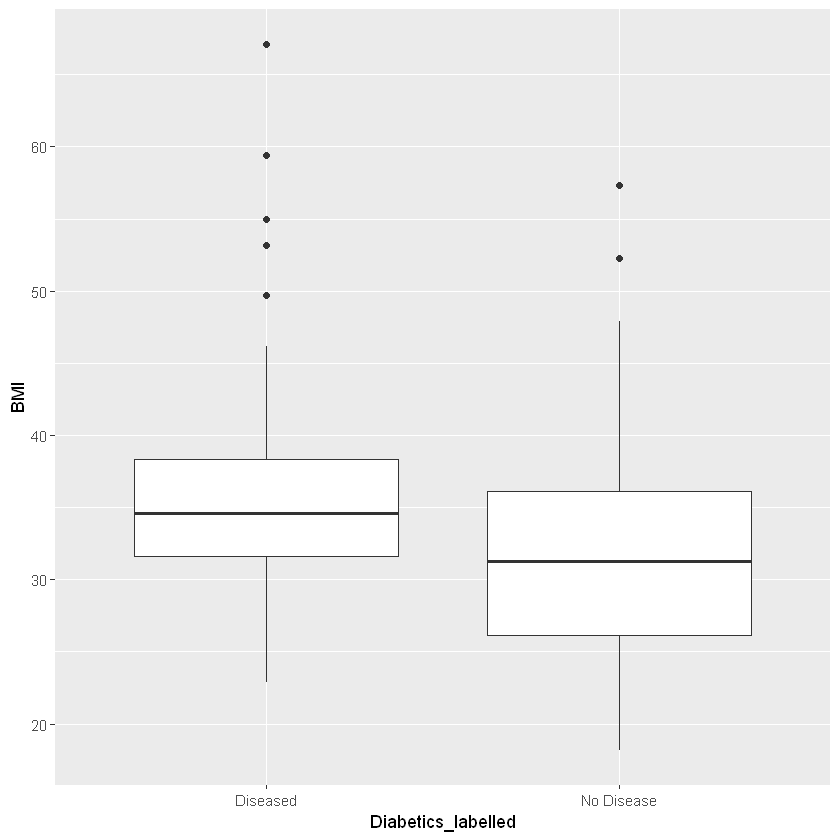

In [41]:
# we can also use boxplots
diabetes_data %>% mutate(Diabetics_labelled = ifelse(Diabetic == 1, "Diseased", "No Disease")) -> diabetes_data

# Age vs Diabetic
ggplot(data = diabetes_data, aes(x = Diabetics_labelled, y = Age)) + geom_boxplot()

# Glucose  vs Diabetic
ggplot(data = diabetes_data, aes(x = Diabetics_labelled, y = Glucose)) + geom_boxplot()

# BMI vs Diabetic
ggplot(data = diabetes_data, aes(x = Diabetics_labelled, y = BMI)) + geom_boxplot()

## 6. Putting desired variables into a model
Both statistical tests and visualisations confirm that these variables have somewhat of a high association with our outcome (p<0.001 for tests).

We can input these variables into a multiple logistic regression model since we have multiple variables aiming to solve a binary classifcation problem.

In [42]:
# use glm function from base R and specify the family argument as binomial
model <- glm(data = diabetes_data, Diabetic ~ Age + Glucose + BMI, family = "binomial")

#checkout the summmary of the model
summary(model)


Call:
glm(formula = Diabetic ~ Age + Glucose + BMI, family = "binomial", 
    data = diabetes_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6030  -0.6666  -0.3815   0.6765   2.4804  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -9.677346   1.041873  -9.288  < 2e-16 ***
Age          0.054075   0.013236   4.085 4.40e-05 ***
Glucose      0.036266   0.004906   7.391 1.45e-13 ***
BMI          0.077860   0.020120   3.870 0.000109 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 498.10  on 391  degrees of freedom
Residual deviance: 354.37  on 388  degrees of freedom
AIC: 362.37

Number of Fisher Scoring iterations: 5


## 7. Odds Ratio (OR) 
Additionally it also good medical research practice to include the Odds Ratio (OR) to indicate the absence or presence with a variable with the presence or absence of the outcome (diabetic or not).

OR > 1 :  Variable positively associated with Outcome
OR <= 1 : Varaible negatively associated with Outcome 

The raw glm coefficient table in R represents the log(Odds Ratio) of the outcome. Therefore, we need to convert the values to the original OR scale and calculate the corresponding 95% Confidence Interval (CI) of the estimated Odds Ratio when reporting results from a logistic regression.

In [43]:
# load the broom package
require(broom)

# tidy up the coefficient table
tidy_m <- model %>% tidy()
tidy_m

# calculate OR
tidy_m$OR <- exp(tidy_m$estimate)

# calculate 95% CI and save as lower CI and upper CI
tidy_m$lower_CI <- exp(tidy_m$estimate - 1.96 * tidy_m$std.error)
tidy_m$upper_CI <- exp(tidy_m$estimate + 1.96 * tidy_m$std.error)

# display the updated coefficient table
tidy_m

term,estimate,std.error,statistic,p.value
(Intercept),-9.67734580,1.041873244,-9.288410,1.566104e-20
Age,0.05407546,0.013236226,4.085414,4.399829e-05
Glucose,0.03626559,0.004906499,7.391337,1.453597e-13
BMI,0.07786001,0.020120396,3.869706,1.089669e-04


term,estimate,std.error,statistic,p.value,OR,lower_CI,upper_CI
(Intercept),-9.67734580,1.041873244,-9.288410,1.566104e-20,6.268767e-05,8.134329e-06,0.0004831061
Age,0.05407546,0.013236226,4.085414,4.399829e-05,1.055564e+00,1.028532e+00,1.0833070692
Glucose,0.03626559,0.004906499,7.391337,1.453597e-13,1.036931e+00,1.027007e+00,1.0469512021
BMI,0.07786001,0.020120396,3.869706,1.089669e-04,1.080971e+00,1.039172e+00,1.1244522018


## 8. Adding desired values to predicted probabilities from our model
So in application, lets imagine a patient who is 55 years old, has a glucose level of 175 mg/dl, and a BMI of 30.0 walks in and sees a doctor for a blood test. How well can our model predict if the person is diabetic or not?

In [44]:
# get the predicted probability in our dataset using the predict() function
pred_prob <- predict(model, diabetes_data, type = "response")

# create a decision rule using probability 0.5 as cutoff and save the predicted decision into the main data frame
diabetes_data$pred_diabetes <- ifelse(pred_prob>=.5,1,0)

# create a newdata data frame to save a new case information
newdata <- data.frame(Age = 55, Glucose = 175, BMI = 30.0)

# predict probability for this new case and print out the predicted value
p_new <- predict(model, newdata, type = "response")
p_new

1 
0.8785833

## 0.87, this patient is at high risk of diabetes! Hurry lets get on Keto!

## 9. Model performance metrics

In [45]:
# load Metrics package
library(Metrics)

# calculate auc, accuracy, clasification error
auc <- auc(diabetes_data$Diabetic, diabetes_data$pred_diabetes)
accuracy <- accuracy(diabetes_data$Diabetic, diabetes_data$pred_diabetes)
classification_error <- ce(diabetes_data$Diabetic, diabetes_data$pred_diabetes)

# print out the metrics on to screen
print(paste("AUC=", auc))
print(paste("Accuracy=", accuracy))
print(paste("Classification Error=", classification_error))

# confusion matrix
table(diabetes_data$Diabetic, diabetes_data$pred_diabetes, dnn=c("True Status","Predicted Status")) # confusion matrix

[1] "AUC= 0.746564885496183"
[1] "Accuracy= 0.795918367346939"
[1] "Classification Error= 0.204081632653061"


           Predicted Status
True Status   0   1
          0 234  28
          1  52  78

## 0.79 Accuracy using a Logistic regression 

## NOTES:
- Could use a sex variable in the future